In [2]:
# dictionaries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import truncnorm, lognorm, gamma

/Users/elisaheinrichmora/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [26]:
def haploid_mutation_2m(generations, s1, s2, u1, u2, v1, v2, x1_init, x2_init, x3_init, x4_init, switch_interval=10):
    """
    Simulate the genetic model with fitness values alternating between two states.

    Parameters:
    generations : int - Number of generations to simulate
    s1, s2 : float - Selection coefficients for alternating fitness states
    u1, u2 : float - Forward mutation rates
    v1, v2 : float - Back mutation rates
    x1_init, x2_init, x3_init, x4_init : float - Initial frequencies of genotypes AM1, aM1, AM2, aM2
    switch_interval : int - Number of generations before switching fitness values

    Returns:
    Frequencies of x1, x2, x3, x4 over generations.
    """
    # Arrays to store frequencies over generations
    x1 = np.zeros(generations)
    x2 = np.zeros(generations)
    x3 = np.zeros(generations)
    x4 = np.zeros(generations)

    # Initialize frequencies
    x1[0], x2[0], x3[0], x4[0] = x1_init, x2_init, x3_init, x4_init

    # Function to calculate mean fitness
    def mean_fitness(x1, x2, x3, x4, W_A, W_a):
        return x1 * W_A + x2 * W_a + x3 * W_A + x4 * W_a

    # Evolution over generations
    for t in range(1, generations):
        # Switch fitness values every `switch_interval` generations
        if (t // switch_interval) % 2 == 0:
            W_A, W_a = 1 + s2 , 1 - s1
        else:
            W_A, W_a = 1 - s1, 1 + s2

        # Calculate mean fitness
        W_mean = mean_fitness(x1[t-1], x2[t-1], x3[t-1], x4[t-1], W_A, W_a)

        # After selection
        x1_prime = x1[t-1] * W_A / W_mean
        x2_prime = x2[t-1] * W_a / W_mean
        x3_prime = x3[t-1] * W_A / W_mean
        x4_prime = x4[t-1] * W_a / W_mean

        # After mutation
        x1[t] = x1_prime * (1 - u1) + x2_prime * v1
        x2[t] = x2_prime * (1 - v1) + x1_prime * u1
        x3[t] = x3_prime * (1 - u2) + x4_prime * v2
        x4[t] = x4_prime * (1 - v2) + x3_prime * u2

        # Normalize to ensure frequencies sum to 1
        total = x1[t] + x2[t] + x3[t] + x4[t]
        x1[t] /= total
        x2[t] /= total
        x3[t] /= total
        x4[t] /= total

    return x1, x2, x3, x4



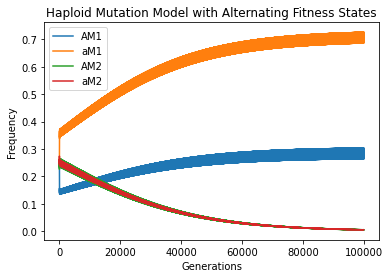

In [34]:
# Example 
generations = 100000
s1 = 0.1
s2 = 0.1
u1, u2 = 0.05, 0.02
v1, v2 = 0.02, 0.02
x1_init, x2_init, x3_init, x4_init = 0.25, 0.25, 0.25, 0.25
switch_interval = 1

x1, x2, x3, x4 = haploid_mutation_2m(generations, s1, s2, u1, u2, v1, v2, x1_init, x2_init, x3_init, x4_init, switch_interval)

# Plot results
plt.plot(x1, label="AM1")
plt.plot(x2, label="aM1")
plt.plot(x3, label="AM2")
plt.plot(x4, label="aM2")
plt.xlabel("Generations")
plt.ylabel("Frequency")
plt.legend()
plt.title("Haploid Mutation Model with Alternating Fitness States")
plt.show()

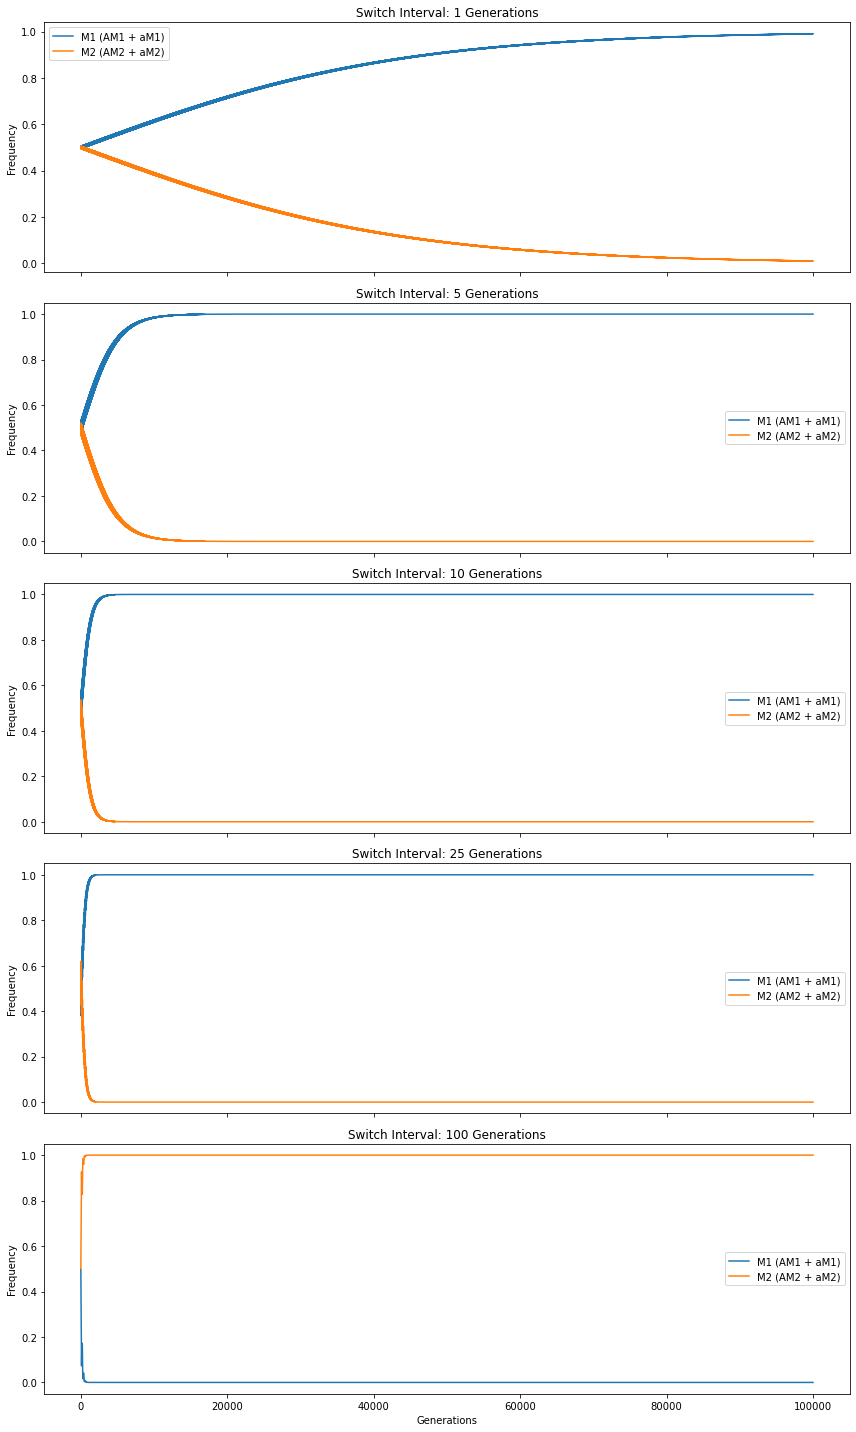

In [40]:
# For different generations
generations = 100000
s1 = 0.1
s2 = 0.1
u1, u2 = 0.05, 0.02
v1, v2 = 0.02, 0.02
x1_init, x2_init, x3_init, x4_init = 0.25, 0.25, 0.25, 0.25

switch_intervals = [1, 5, 10, 25, 100]
# Plot results for different switch intervals
fig, axes = plt.subplots(len(switch_intervals), 1, figsize=(12, 20), sharex=True)

for i, switch_interval in enumerate(switch_intervals):
    x1, x2, x3, x4 = haploid_mutation_2m(generations, s1, s2, u1, u2, v1, v2, x1_init, x2_init, x3_init, x4_init, switch_interval)
    
    M1_freq = x1 + x2  # Aggregate AM1 and aM1
    M2_freq = x3 + x4  # Aggregate AM2 and aM2

    axes[i].plot(M1_freq, label="M1 (AM1 + aM1)")
    axes[i].plot(M2_freq, label="M2 (AM2 + aM2)")
    
    axes[i].set_ylabel("Frequency")
    axes[i].set_title(f"Switch Interval: {switch_interval} Generations")
    axes[i].legend()

axes[-1].set_xlabel("Generations")
# plt.suptitle("Effect of Switching Fitness Intervals on Modifier Allele Frequencies (M1 vs. M2)")
plt.tight_layout()
plt.show()
